In [1]:
import numpy as np
from keras import datasets
from keras import models, layers
from keras.utils import np_utils
import tensorflow as tf
import matplotlib.pyplot as plt

from keras import backend

In [2]:
# DataLoader
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train.shape # 흑백은 채널이 따로 없지만, CNN을 위해 채널 필요함

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

In [3]:
H, W = X_train.shape[1:]

In [4]:
channel = backend.image_data_format()
channel

if channel == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, H, W) # X_train.shape[0] 대신에 -1 써도 동일한 표현
    X_test = X_test.reshape(X_test.shape[0], 1, H, W)
    input_shape = (1, H, W) # 채널이 앞으로 간다
else:
    X_train = X_train.reshape(X_train.shape[0], H, W, 1)
    X_test = X_test.reshape(X_test.shape[0], H, W, 1)
    input_shape = (H, W, 1) # 채널이 뒤로 간다

In [5]:
# scaling
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [6]:
# y값 전처리하기...One Hot Encoding
print(y_train[0])
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)
print(Y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [7]:
# model 생성
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))
# 마지막에 1차원으로 펼쳐서 FCN을 만든다.
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [8]:
# compile
model.compile('rmsprop', 'categorical_crossentropy', 'accuracy')

In [9]:
# fit&history
history = model.fit(X_train, Y_train, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 49s 13ms/step - loss: 0.5675 - accuracy: 0.8642 - val_loss: 0.9941 - val_accuracy: 0.9627
Epoch 2/20
375/375 [==============================] - 5s 12ms/step - loss: 0.0882 - accuracy: 0.9739 - val_loss: 0.0545 - val_accuracy: 0.9852
Epoch 3/20
375/375 [==============================] - 4s 12ms/step - loss: 0.0751 - accuracy: 0.9786 - val_loss: 0.0600 - val_accuracy: 0.9852
Epoch 4/20
375/375 [==============================] - 4s 11ms/step - loss: 0.0634 - accuracy: 0.9820 - val_loss: 0.0770 - val_accuracy: 0.9837
Epoch 5/20
375/375 [==============================] - 4s 11ms/step - loss: 0.0575 - accuracy: 0.9843 - val_loss: 0.0735 - val_accuracy: 0.9862
Epoch 6/20
375/375 [==============================] - 4s 12ms/step - loss: 0.0514 - accuracy: 0.9859 - val_loss: 0.0581 - val_accuracy: 0.9879
Epoch 7/20
375/375 [==============================] - 4s 12ms/step - loss: 0.0563 - accuracy: 0.9857 - val_loss: 0.0618 - val_accuracy: 0.986

In [10]:
# evaluation
score = model.evaluate(X_test, Y_test)
print("Loss : {}, Accuracy : {}".format(*score))

313/313 [==============================] - 1s 3ms/step - loss: 0.0474 - accuracy: 0.9870
Loss : 0.047437239438295364, Accuracy : 0.9869999885559082


In [11]:
# 시각화
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])

def plot_accuracy(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])

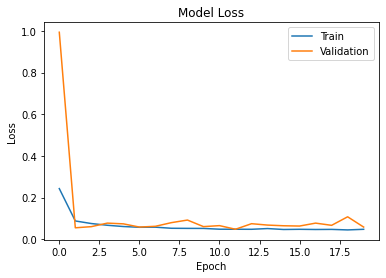

In [12]:
plot_loss(history)

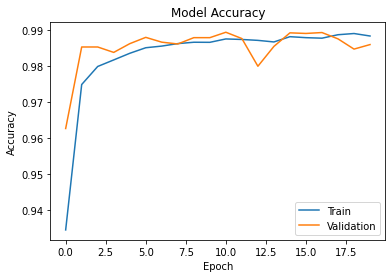

In [13]:
plot_accuracy(history)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1